In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from kydavra import PointBiserialCorrSelector
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV

In [2]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [3]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [14]:
# def pointbiserialrcorr(features,label):
#     corr_value=[]
#     p_value=[]
#     df = pd.DataFrame()
#     for i in range(len(features.axes[1])):
#         print(features.iloc[:,i])
#         corr, p=stats.pointbiserialr(features.iloc[:,i],label)
#         corr_value.append(corr)
#         p_value.append(p)
#         print(corr_value)
#         print(p_value)
#     return corr_value,p_value

In [17]:
# stats.pointbiserialr(X_train.iloc[:,1],y_train)

SignificanceResult(statistic=0.24382346433462224, pvalue=1.269278869087625e-108)

In [13]:
# r_regression(X_train,y_train)

array([-1.08018897e-01,  2.43823464e-01,  2.06044528e-01,  4.99643056e-02,
       -1.07987443e-01,  2.38750651e-01,  2.90440674e-01,  2.28892897e-01,
        1.38264320e-01,  1.66238824e-01,  3.10053366e-02,  1.11315385e-02,
        2.70090424e-03,  1.40182499e-02,  2.20704251e-02, -3.50429361e-02,
        2.22672525e-02,  1.73902114e-03,  2.38055448e-02,  2.73985715e-02,
        2.38584573e-01,  1.03309991e-01, -1.87176719e-02,  2.02942972e-01,
        8.65442491e-02,  1.70261212e-01,  9.05937295e-02,  1.42349667e-01,
        5.11106479e-02,  5.81949841e-02,  6.11641784e-02,  2.24465713e-01,
        1.13779790e-01,  1.61251915e-01,  1.92828008e-02,  1.11315385e-02,
        3.49519392e-02,  4.93467715e-03,  1.11315385e-02, -3.51522733e-03,
        0.00000000e+00,  2.25189959e-02,  5.54862689e-02, -2.54055938e-02,
        1.41881357e-01, -1.23294728e-01, -1.92812040e-01,  2.65961605e-02,
        5.35270544e-02,  4.45593893e-02,  2.94623331e-02, -3.37552448e-02,
        1.00684856e-02, -

In [21]:
cleaned_df

,status,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [6]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [7]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [8]:
selector = VarianceThreshold()
selector.fit_transform(cleaned_df)


array([[  0,   0,  37, ...,   0,   0,   0],
       [  1,   0,  77, ...,   0,   0,   0],
       [  1,   1, 126, ...,   0,   0,   0],
       ...,
       [  0,   1, 105, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       [  1,   0, 477, ...,   0,   0,   0]], dtype=int64)

In [25]:
removed=cleaned_df.loc[:, ~selector.get_support()]

In [26]:
removed.columns

Index(['hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_asterisk_count', 'hostname_hashtag_count',
       'hostname_dollar_count', 'hostname_percent_count',
       'query_hashtag_count', 'file_slash_count', 'file_questionmark_count',
       'file_space_count', 'file_hashtag_count', 'file_dollar_count'],
      dtype='object')

In [9]:
cleaned_df=cleaned_df.loc[:, selector.get_support()]

In [10]:
cleaned_df

,phishing,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# def pointbiserialrcorr(features,label):
#     corr_value=np.empty((0, 0))
#     p_value=corr_value=np.empty((0, 0))
#     for i in range(len(features.axes[1])):
#         print(features.iloc[:,i])
#         #corr, p=stats.pointbiserialr(features.iloc[:,i],label)
#         corr, p=stats.pointbiserialr(features.iloc[:,i],label)
#         corr=abs(corr)
#         corr=abs(corr)
#         corr_value=np.append(corr_value,corr)
#         p_value=np.append(p_value,p)
#         # corr_value.append(corr)
#         # p_value.append(p)
#         # print(corr_value)
#         # print(p_value)
#     return corr_value,p_value

In [29]:
def pointbiserialrcorr(features,label):
    corr_value=np.empty((0, 0))
    p_value=corr_value=np.empty((0, 0))
    features=features.T
    for i in range(len(features)):
        corr, p=stats.pointbiserialr(features[i],label)
        corr_value=np.append(corr_value,corr)
        p_value=np.append(p_value,p)
    return corr_value,p_value

In [250]:
# def pointbiserialrcorr(features,label):
#     corr_value=[]
#     p_value=[]
#     df = pd.DataFrame()
#     for i in range(len(features.axes[1])):
#         print(features.iloc[:,i])
#         corr, p=stats.pointbiserialr(features.iloc[:,i],label)
#         corr_value.append(corr)
#         p_value.append(p)
#         print(corr_value)
#         print(p_value)
#     return corr_value,p_value

In [ ]:
# r,p=pointbiserialrcorr(X_train,y_train)
# test =pd.Series(r)
# test.index = X_train.columns
# plot =test.sort_values(ascending=False).plot.bar(figsize=(20, 8))

corr, p=stats.pointbiserialr(X_train_np_test,y_train_np)

matrix.reshape(1,-1)

In [103]:
# def pointbiserialrcorr(features,label):
#     corr_value=np.empty((0, 0))
#     p_value=corr_value=np.empty((0, 0))
#     for i in range(len(features)):
#         print(features.shape)
#         print(label.shape)
#         #corr, p=stats.pointbiserialr(features.iloc[:,i],label)
#         print(features[i])
#         print(label)
#         # corr, p=stats.pointbiserialr(features[i],label)
#         # corr=abs(corr)
#         # corr=abs(corr)
#         # corr_value=np.append(corr_value,corr)
#         # p_value=np.append(p_value,p)
#         # corr_value.append(corr)
#         # p_value.append(p)
#         # print(corr_value)
#         # print(p_value)
#     #return corr_value,p_value

In [11]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


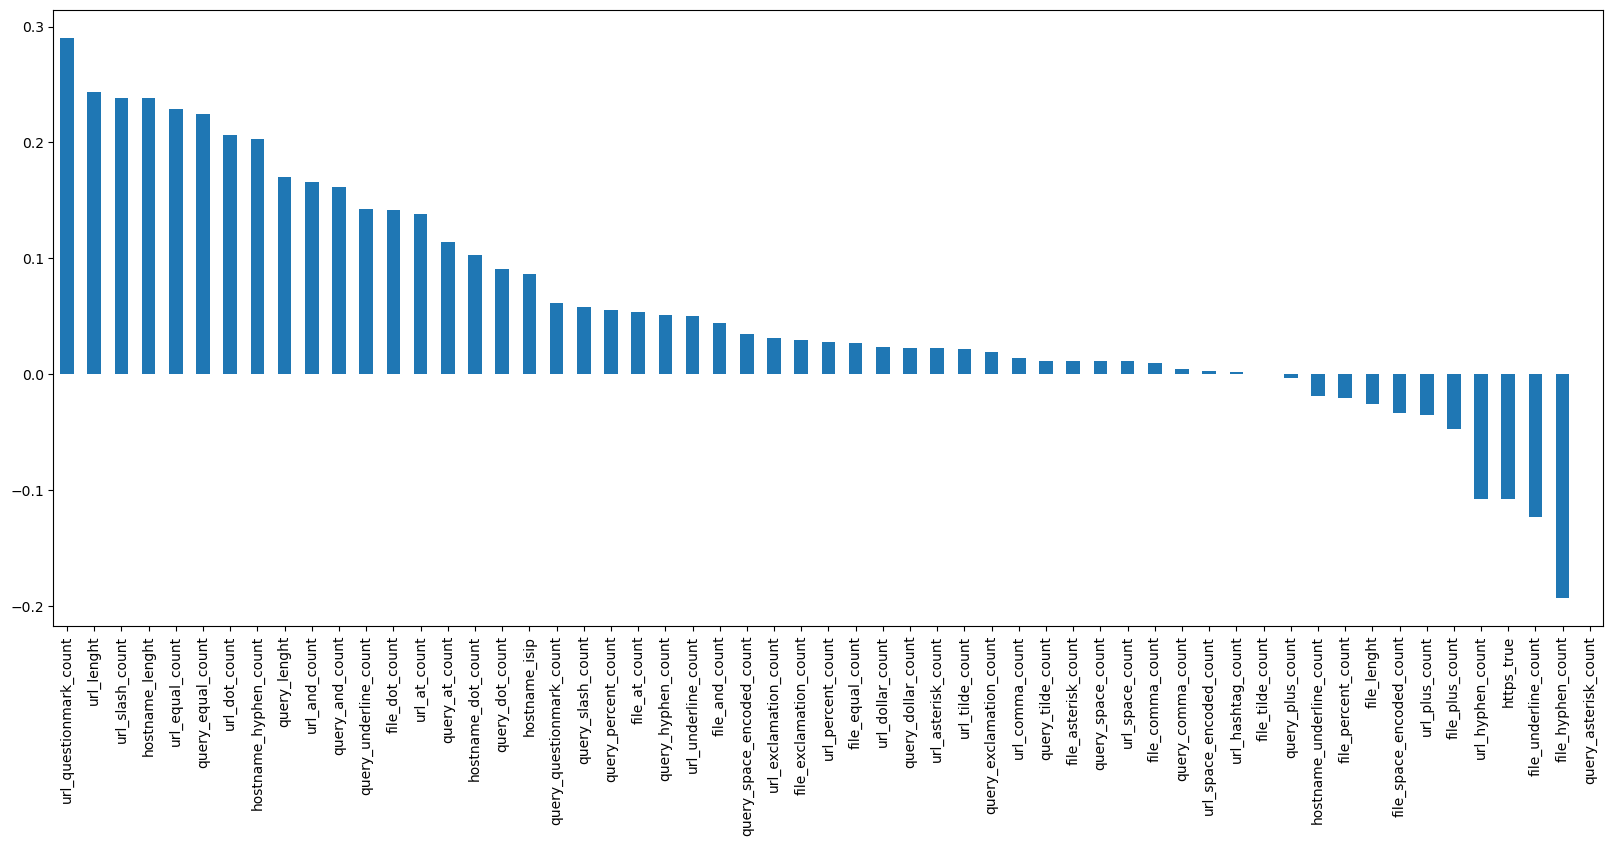

In [35]:
pbc=SelectKBest(score_func=pointbiserialrcorr, k='all')
pbc.fit(X_train,y_train)
pointbiserial = pd.Series(pbc.scores_)
pointbiserial.index = X_train.columns
plot =pointbiserial.sort_values(ascending=False).plot.bar(figsize=(20, 8))
fig = plot.get_figure()
fig.savefig("PoC_Pointbiserial_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

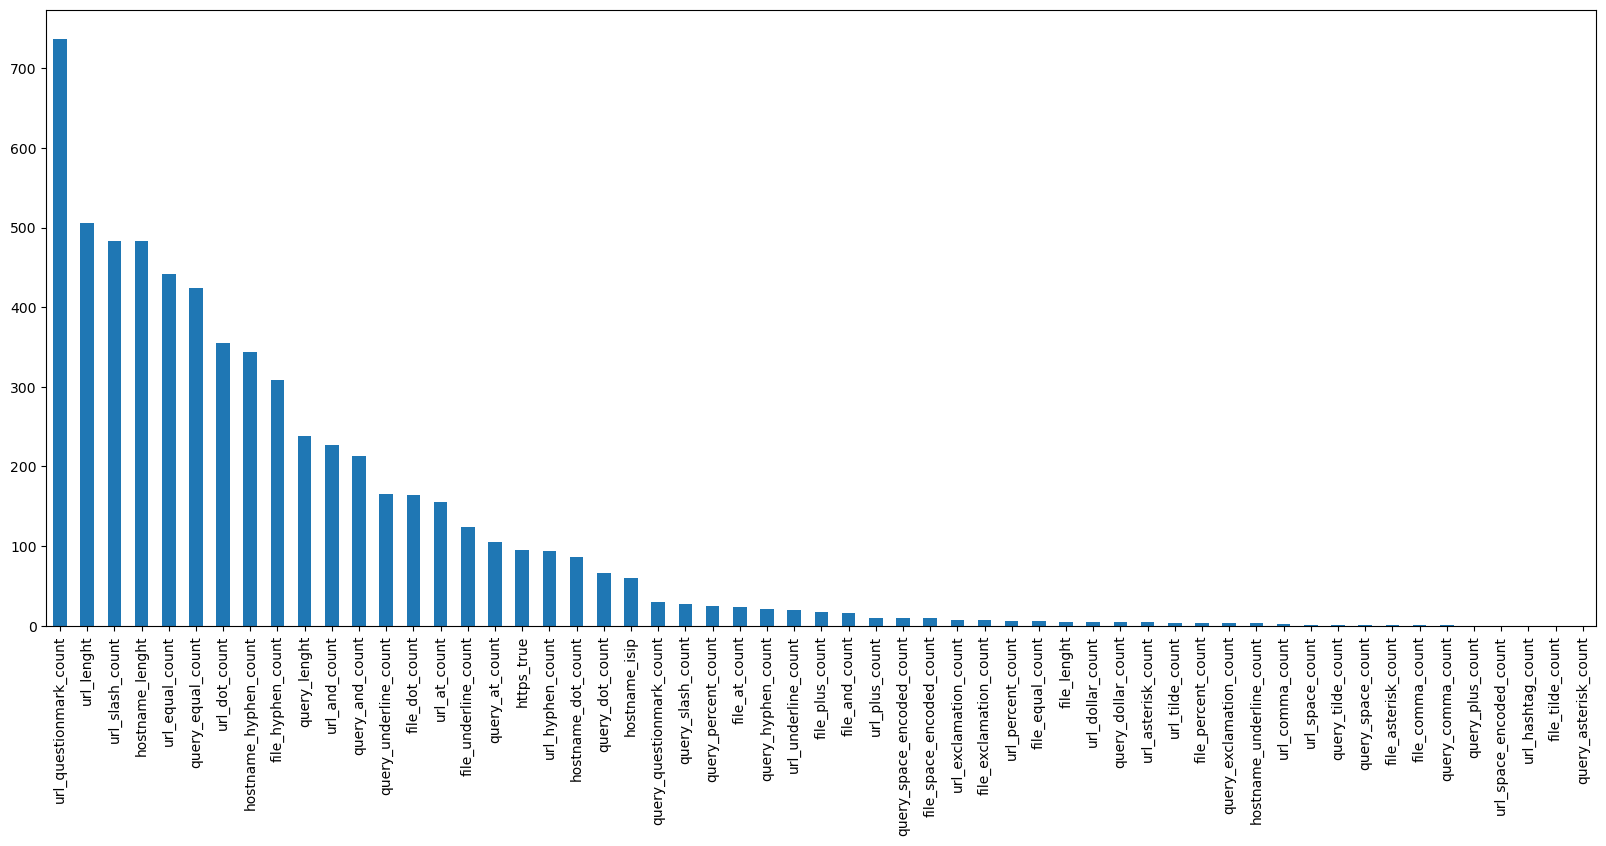

In [215]:
pcf=SelectKBest(score_func=f_regression, k=50)
pcf.fit(X_train,y_train)
pearsonf = pd.Series(pcf.scores_)
pearsonf.index = X_train.columns
plot =pearsonf.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Pearsons_Correlation_F_score_Filter.png",dpi=300, bbox_inches = "tight")

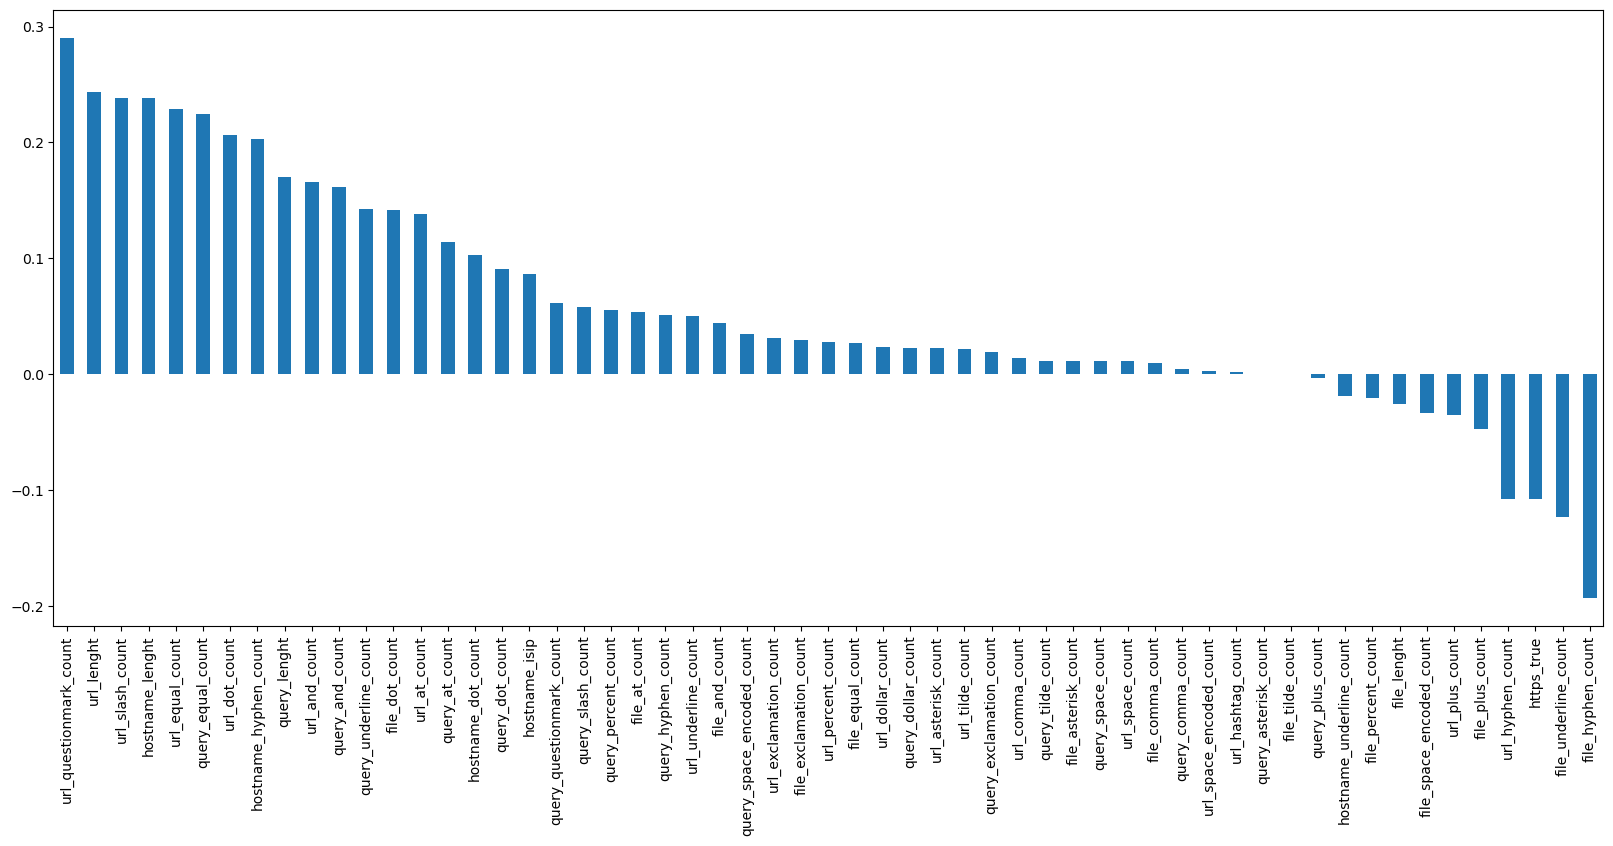

In [189]:
pc=SelectKBest(score_func=r_regression, k=50)
pc.fit(X_train,y_train)
pearson = pd.Series(pc.scores_)
pearson.index = X_train.columns
plot =pearson.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

In [ ]:
# fr=SelectKBest(score_func=f_regression, k='all')
# fr.fit(X_train,y_train)
# f_score = pd.Series(fr.scores_)
# f_score .index = X_train.columns
# plot =f_score .sort_values(ascending=False).plot.bar(figsize=(20, 8))
# #anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
# fig = plot.get_figure()
# fig.savefig("PoC_f_score _Filter.png",dpi=300, bbox_inches = "tight")

In [11]:
clf = svm.SVC(verbose=True)

In [12]:
sfs = SequentialFeatureSelector(clf,n_features_to_select=30,scoring='accuracy')

In [15]:
sfs.fit(X_train, y_train)

NameError: name 'sfs' is not defined

In [14]:
selected_features = sfs.get_support()

NameError: name 'sfs' is not defined

In [13]:
X_test_selected=X_test.loc[:, sfs.get_support()]

NameError: name 'sfs' is not defined

In [17]:
X_train_selected=X_train.loc[:, sfs.get_support()]

In [16]:
X_test_test_selected=X_test.loc[:,['url_underline_count', 'url_hyphen_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'url_exclamation_count', 'url_space_count',
       'url_comma_count', 'url_plus_count', 'url_asterisk_count',
       'url_dollar_count', 'hostname_dot_count', 'hostname_underline_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_slash_count',
       'query_questionmark_count', 'query_at_count', 'query_space_count',
       'query_space_encoded_count', 'query_tilde_count', 'file_dot_count',
       'file_underline_count', 'file_hyphen_count', 'file_equal_count',
       'file_and_count', 'file_exclamation_count', 'file_space_encoded_count']]

In [17]:
X_train_train_selected=X_train.loc[:,['url_underline_count', 'url_hyphen_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'url_exclamation_count', 'url_space_count',
       'url_comma_count', 'url_plus_count', 'url_asterisk_count',
       'url_dollar_count', 'hostname_dot_count', 'hostname_underline_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_slash_count',
       'query_questionmark_count', 'query_at_count', 'query_space_count',
       'query_space_encoded_count', 'query_tilde_count', 'file_dot_count',
       'file_underline_count', 'file_hyphen_count', 'file_equal_count',
       'file_and_count', 'file_exclamation_count', 'file_space_encoded_count']]

In [18]:
X_train_train_selected

,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,url_space_count,url_comma_count,...,query_space_count,query_space_encoded_count,query_tilde_count,file_dot_count,file_underline_count,file_hyphen_count,file_equal_count,file_and_count,file_exclamation_count,file_space_encoded_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,0,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,0,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,1,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,0,4,7,1,3,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,0,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,0,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
X_test_selected.columns

NameError: name 'X_test_selected' is not defined

In [26]:
y_test

url
https://www.rga.com/about/workplace                                                                                                                                                                                                      0
http://starasia.com.hk                                                                                                                                                                                                                   0
https://www.youtube.com/watch?v=XszqITK-UEw                                                                                                                                                                                              0
http://www.civico1845.com/                                                                                                                                                                                                               0
http://rapidpaws.com/wp-content/we_transfer/index2.php?e

In [27]:
X_test_selected

,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,url_space_count,url_comma_count,...,query_space_count,query_space_encoded_count,query_tilde_count,file_dot_count,file_underline_count,file_hyphen_count,file_equal_count,file_and_count,file_exclamation_count,file_space_encoded_count
url,,,,,,,,,,,,,,,,,,,,,
https://www.rga.com/about/workplace,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://starasia.com.hk,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.youtube.com/watch?v=XszqITK-UEw,0,1,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.civico1845.com/,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://rapidpaws.com/wp-content/we_transfer/index2.php?email=/,1,1,6,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://myckck.in/redirect.php?id=j4gww2,0,0,3,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
http://www.bcc.ca/buddhism/fournobletruthsandeightfoldpath.html,0,0,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
https://urb7.com/casasbahia/desktop/pag2.php?path=tv-video/Televisores/TV4K/smart-tv-led-55-uhd-4k-lg-55um7520psb-com-thinq-ai-inteligencia-artificial-ips-quad-core-hdr-ativo-dts-virtual-x-webos-4-5-bluetooth-e-hdmi-50004199.html,0,28,8,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


[LibSVM]Accuracy: 0.7716535433070866
Accuracy: 0.7153800824985268


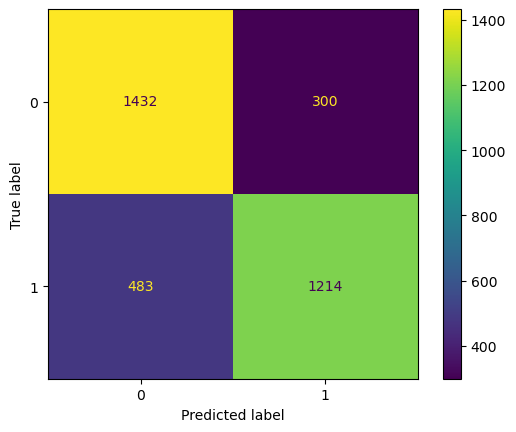

In [19]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [34]:
params = {
    'C': Real(1e-6, 100.0, prior='log-uniform'),
    'gamma': Real(1e-6, 100.0, prior='log-uniform'),
    #'degree': Integer(1,8),
    'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
}

In [35]:
opt = BayesSearchCV(
    svm.SVC(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [ ]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)

In [26]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma': [0.1,0.01,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.0001]},
                    {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma': ['scale','auto']}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [43]:

def hyperpara_random_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma': [0.1,0.01,0.001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  random=RandomizedSearchCV(svm.SVC(),param_distributions=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  random.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(random.best_estimator_)
  print('Best score for data:', random.best_score_)
  print('Best C:',random.best_estimator_.C) 
  print('Best Kernel:',random.best_estimator_.kernel)
  print('Best Gamma:',random.best_estimator_.gamma)

In [21]:
X_train_train_selected

,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,url_space_count,url_comma_count,...,query_space_count,query_space_encoded_count,query_tilde_count,file_dot_count,file_underline_count,file_hyphen_count,file_equal_count,file_and_count,file_exclamation_count,file_space_encoded_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,0,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,0,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,1,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,0,4,7,1,3,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,0,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,0,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
y_train

url
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                  1
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                      1
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                      1
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834    1
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                             1
                                                                                                                                                             ..
http://psychologydictionary.org/pass

In [31]:
X_train_selected

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,query_equal_count,query_at_count,query_and_count,query_percent_count,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,1,44,2,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,88,8,0,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,88,3,0,1,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,1,154,6,0,4,7,1,3,1,2,...,3,1,2,0,1,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,49,2,0,0,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,52,1,0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,41,3,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,36,3,0,0,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
hyperpara_opt(X_train_selected,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


KeyboardInterrupt: 

In [27]:
hyperpara_opt(X_train_train_selected,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
SVC(C=100, gamma=0.1)
Best score for data: 0.7862772988505747
Best C: 100
Best Kernel: rbf
Best Gamma: 0.1


[LibSVM]Accuracy: 0.7707786526684165
Accuracy: 0.7354154390100177


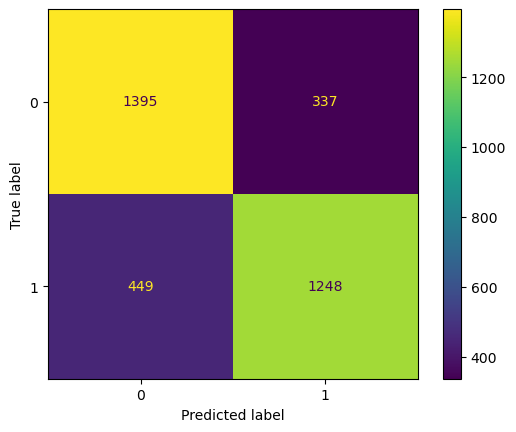

In [19]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.1,verbose=True)
clf.fit(X_train_train_selected, y_train)
y_pred = clf.predict(X_test_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [44]:
hyperpara_random_opt(X_train_train_selected,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
SVC(C=1000, gamma=0.1)
Best score for data: 0.7827776111944028
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.1


In [41]:
hyperpara_opt(X_train_train_selected,y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
SVC(C=100, gamma='auto')
Best score for data: 0.7850268615692153
Best C: 100
Best Kernel: rbf
Best Gamma: auto


[LibSVM]Accuracy: 0.7707786526684165
Accuracy: 0.7407189157336476


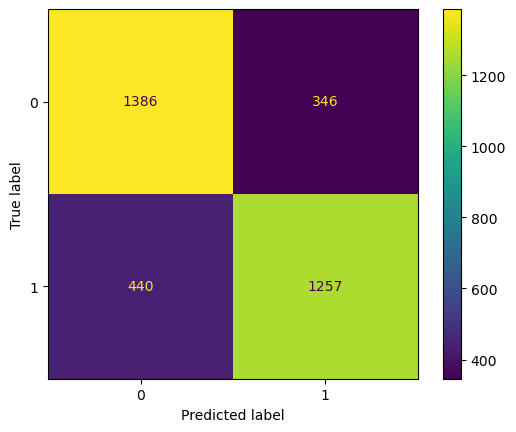

In [45]:
clf = svm.SVC(kernel='rbf',C=1000,gamma=0.1,verbose=True)
clf.fit(X_train_train_selected, y_train)
y_pred = clf.predict(X_test_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

[LibSVM]Accuracy: 0.773986585010207
Accuracy: 0.7472009428403065


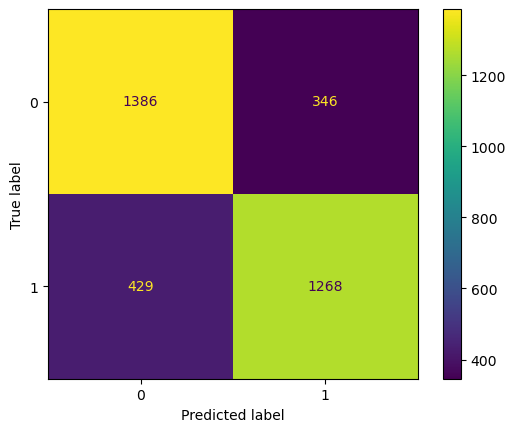

In [42]:
clf = svm.SVC(kernel='rbf',C=100,gamma='auto',verbose=True)
clf.fit(X_train_train_selected, y_train)
y_pred = clf.predict(X_test_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [36]:
opt.fit(X_train_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

BayesSearchCV(cv=4, estimator=SVC(), n_iter=20, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=100.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=100.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'sigmoid', 'rbf'), prior=None)},
              verbose=1)

In [37]:
print(opt.best_score_)
print(opt.best_params_)

0.7881520489755123
OrderedDict([('C', 2.5116092327118134), ('gamma', 0.22733231952650634), ('kernel', 'rbf')])


[LibSVM]Accuracy: 0.7860235003092146
Accuracy: 0.7489687684148497


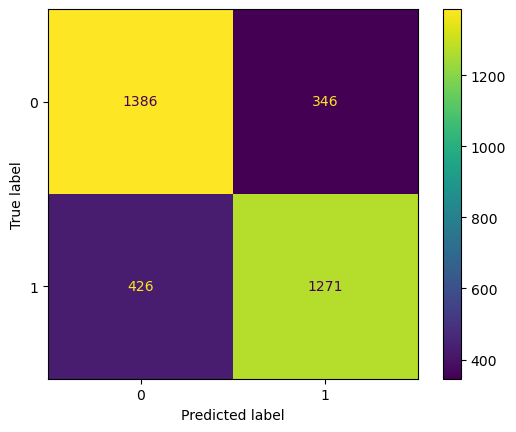

In [40]:
clf1 = svm.SVC(kernel='rbf',C=2.5116092327118134,gamma=0.22733231952650634,verbose=True)
clf1.fit(X_train_train_selected, y_train)
y_pred1 = clf1.predict(X_test_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [15]:
selected_features

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False])

In [119]:
chi=SelectKBest(score_func=chi2, k='all')

In [120]:
chi.fit(X_train,y_train)

InvalidParameterError: The 'score_func' parameter of SelectKBest must be a callable. Got https_true                      56.881900
url_lenght                   24633.543688
url_dot_count                  260.389310
url_underline_count             76.845990
url_hyphen_count               394.626965
url_slash_count                387.305203
url_questionmark_count         631.777330
url_equal_count               1445.652708
url_at_count                   172.484321
url_and_count                  950.712584
url_exclamation_count           13.104637
url_space_count                  0.991289
url_space_encoded_count          0.157117
url_comma_count                  4.454625
url_tilde_count                  4.127911
url_plus_count                  28.677931
url_asterisk_count               3.965157
url_hashtag_count                0.024103
url_dollar_count                15.860627
url_percent_count              110.983779
hostname_lenght               2480.145618
hostname_dot_count              30.843875
hostname_underline_count         5.043937
hostname_hyphen_count          510.074619
hostname_isip                   59.477352
query_lenght                 53867.315116
query_dot_count                483.450213
query_underline_count          807.393255
query_hyphen_count             201.474029
query_slash_count              279.108048
query_questionmark_count        35.768991
query_equal_count             1417.416320
query_at_count                 113.006969
query_and_count                910.950185
query_exclamation_count          5.947735
query_space_count                0.991289
query_space_encoded_count       24.279030
query_comma_count                0.324648
query_tilde_count                1.982578
query_plus_count                 0.337153
query_asterisk_count                  NaN
query_dollar_count              14.869338
query_percent_count            206.917072
file_lenght                    174.063182
file_dot_count                 150.447720
file_underline_count           435.004277
file_hyphen_count             1620.568988
file_equal_count                11.479745
file_at_count                   27.756098
file_and_count                  21.944790
file_exclamation_count           6.939024
file_space_encoded_count        23.205358
file_comma_count                 2.534805
file_tilde_count                 0.000038
file_plus_count                 27.729559
file_asterisk_count              0.991289
file_percent_count              37.393885
dtype: float64 instead.

In [122]:
y_train

url
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                  1
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                      1
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                      1
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834    1
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                             1
                                                                                                                                                             ..
http://psychologydictionary.org/pass

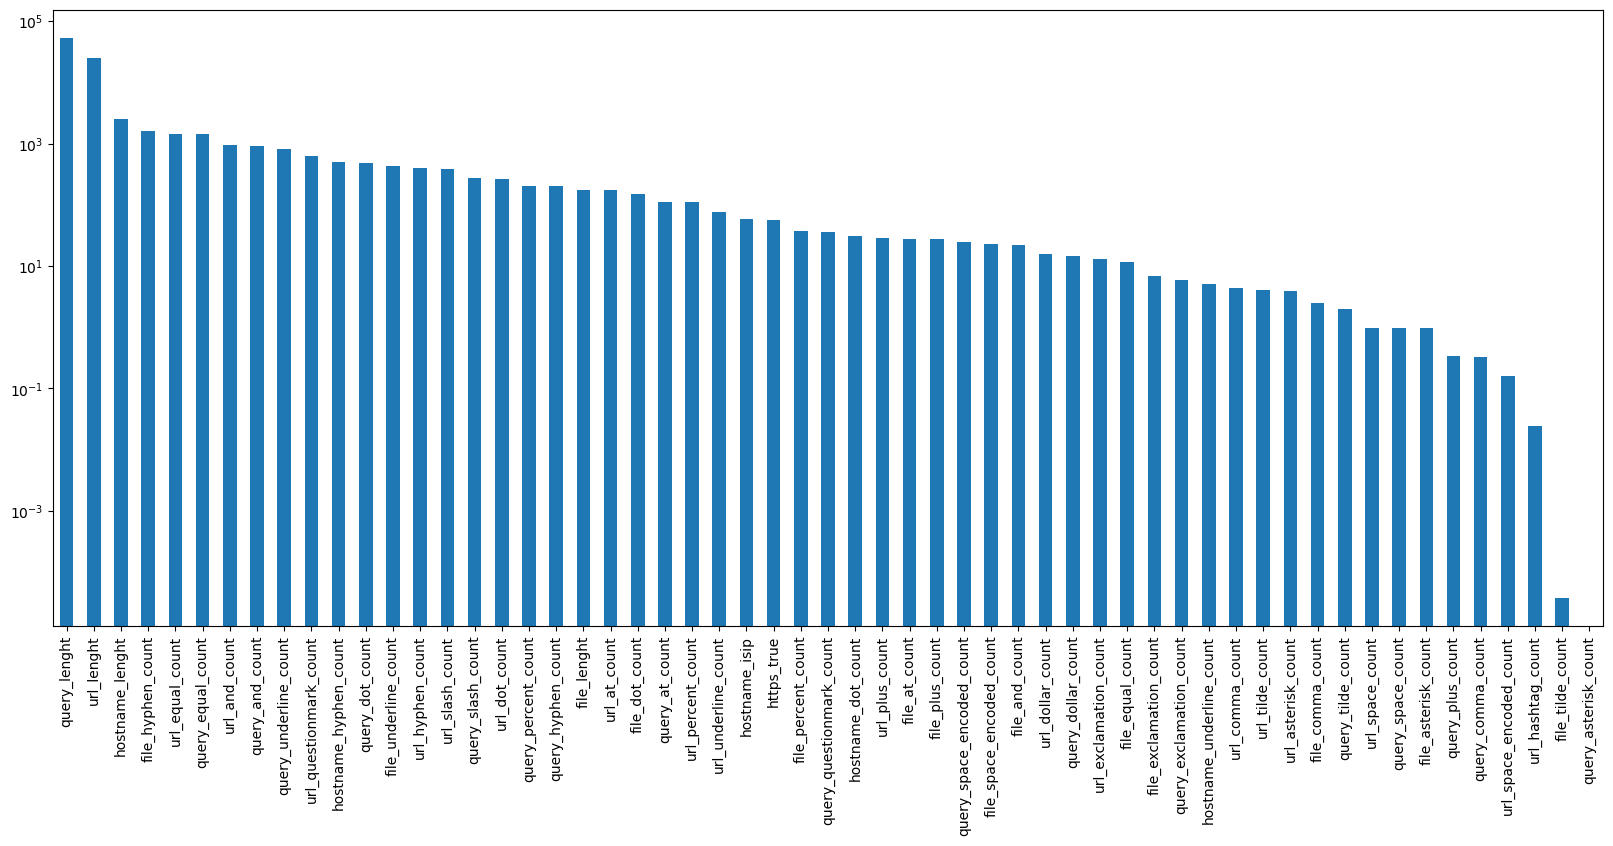

In [133]:
mi=SelectKBest(score_func=chi2, k='all')
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8),logy=True)
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_chi_square_Filter_log.png",dpi=300, bbox_inches = "tight")

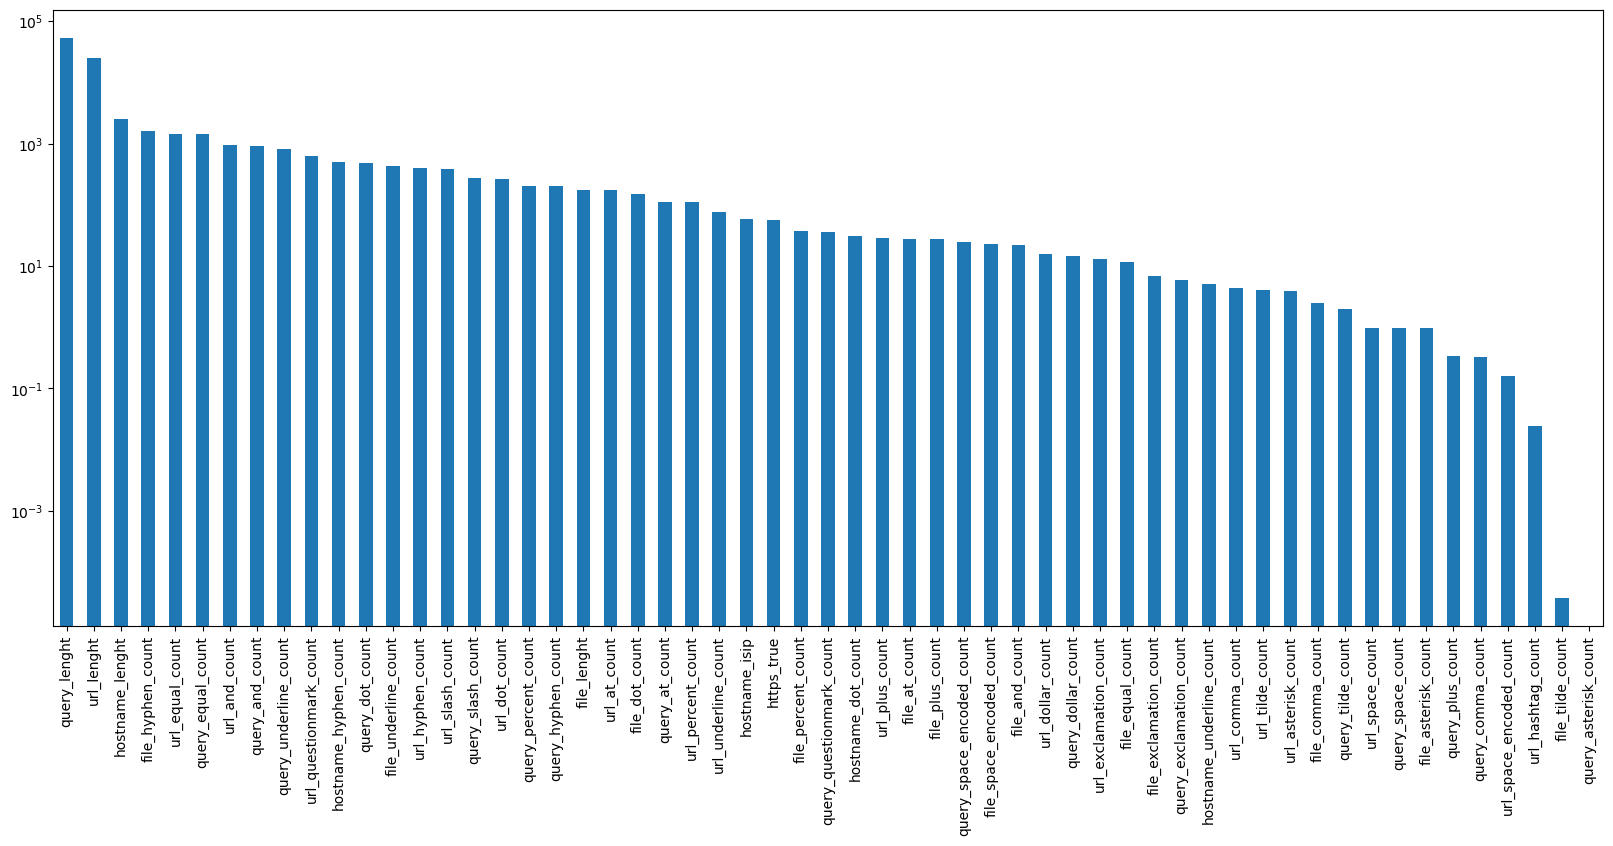

In [165]:
ch=SelectKBest(score_func=chi2, k=50)
ch.fit(X_train,y_train)
ch2 = pd.Series(ch.scores_)
ch2.index = X_train.columns
plot =ch2.sort_values(ascending=False).plot.bar(figsize=(20, 8),logy=True)
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
# fig = plot.get_figure()
# fig.savefig("PoC_chi_square_Filter_log.png",dpi=300, bbox_inches = "tight")

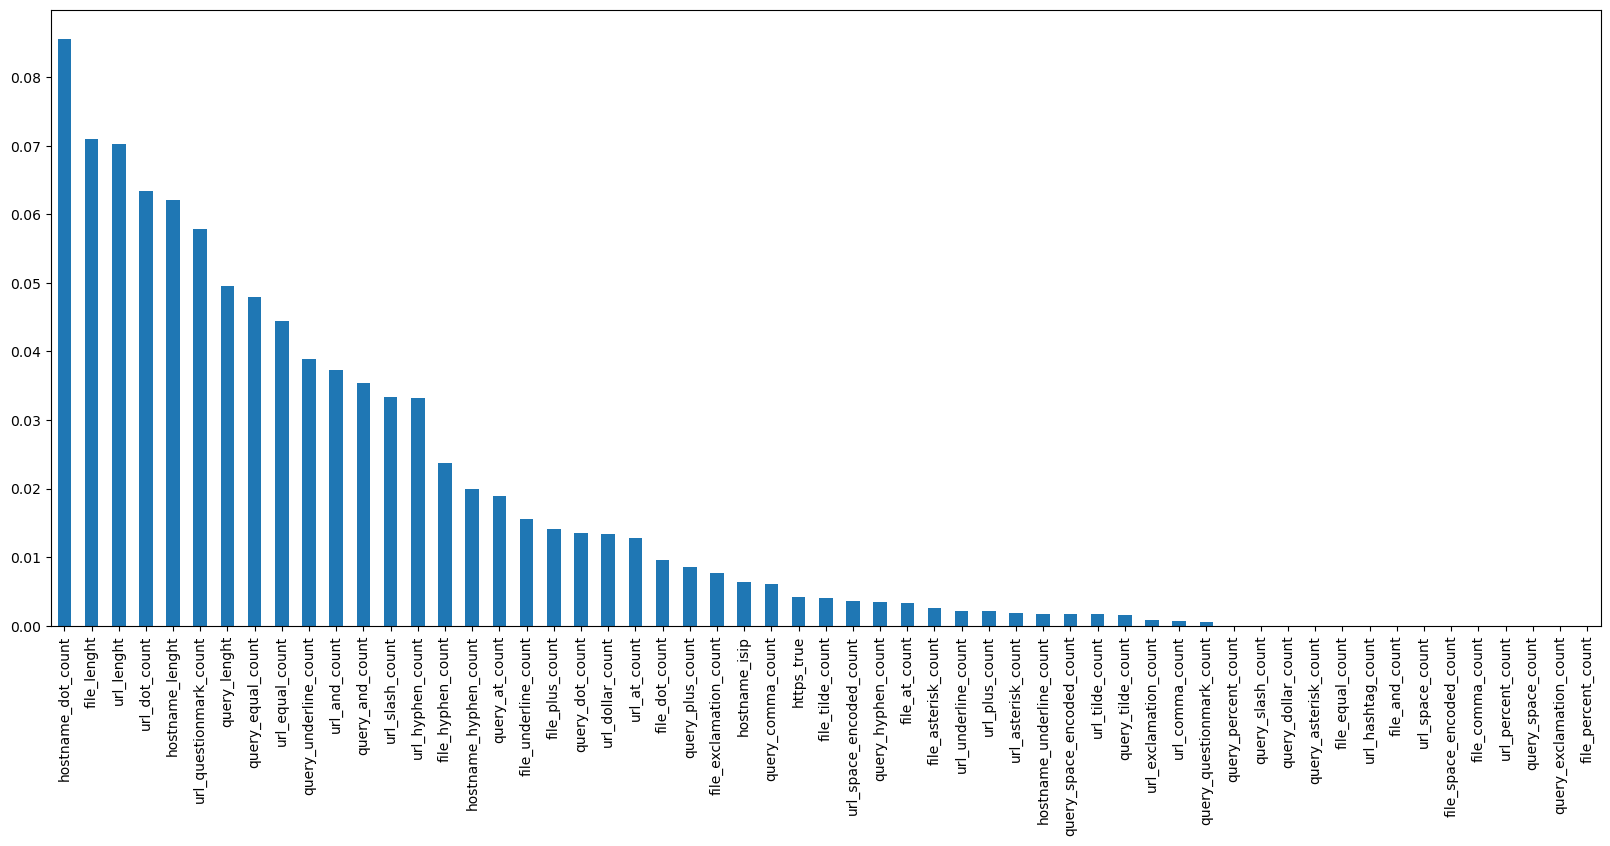

In [99]:
mi=SelectKBest(score_func=mutual_info_classif, k=50)
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Mutual_info_Filter.png",dpi=300, bbox_inches = "tight")

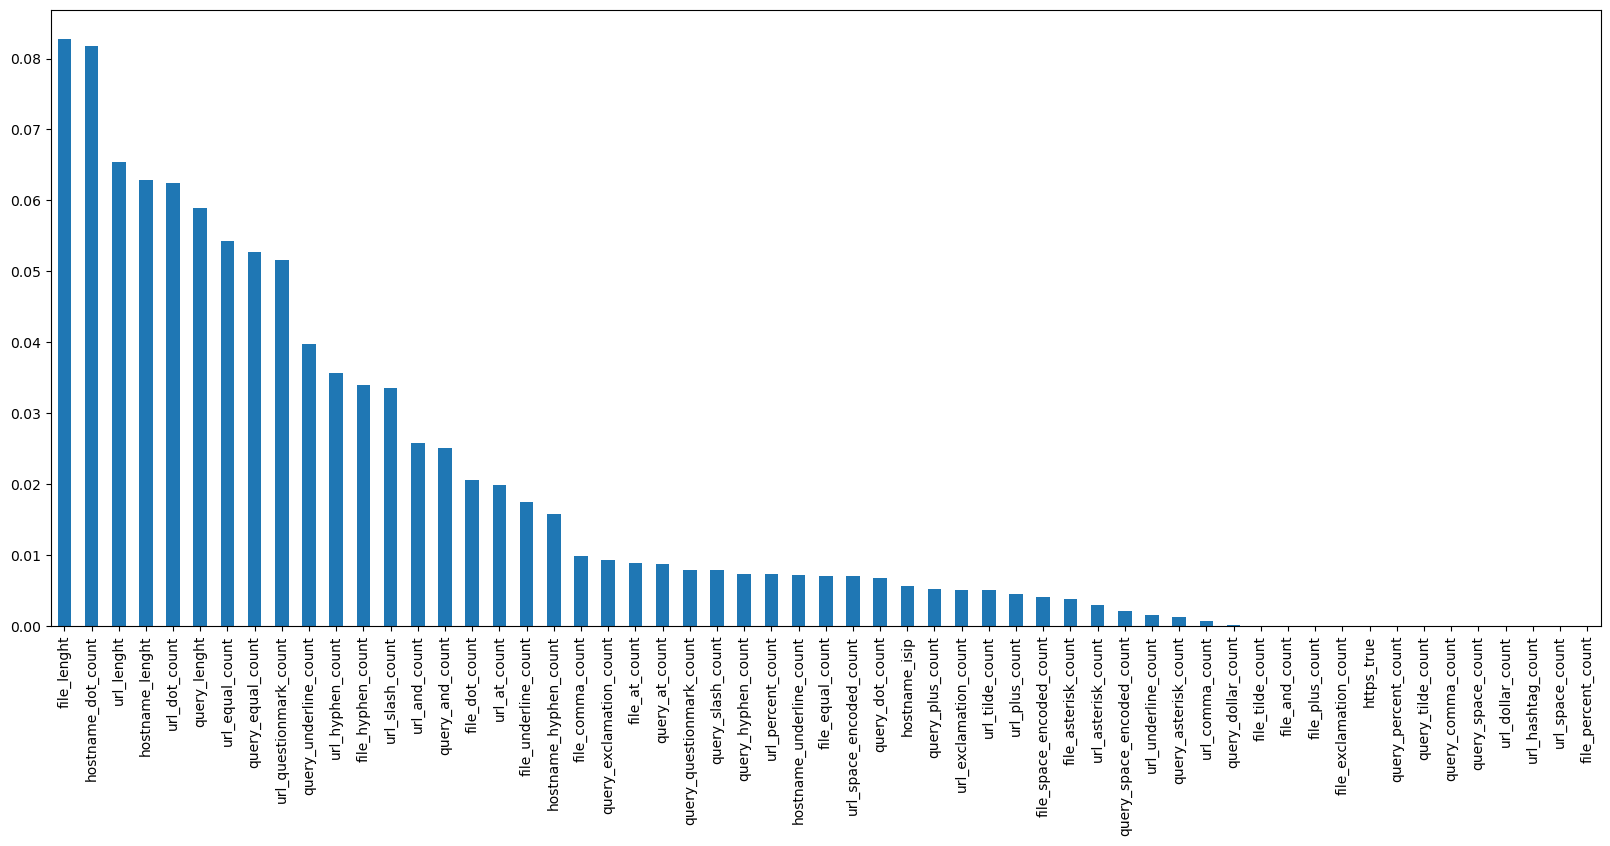

In [123]:
mic=SelectKBest(score_func=mutual_info_classif, k='all')
mic.fit(X_train,y_train)
mutual_info = pd.Series(mic.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Mutual_info_Filter.png",dpi=300, bbox_inches = "tight")

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


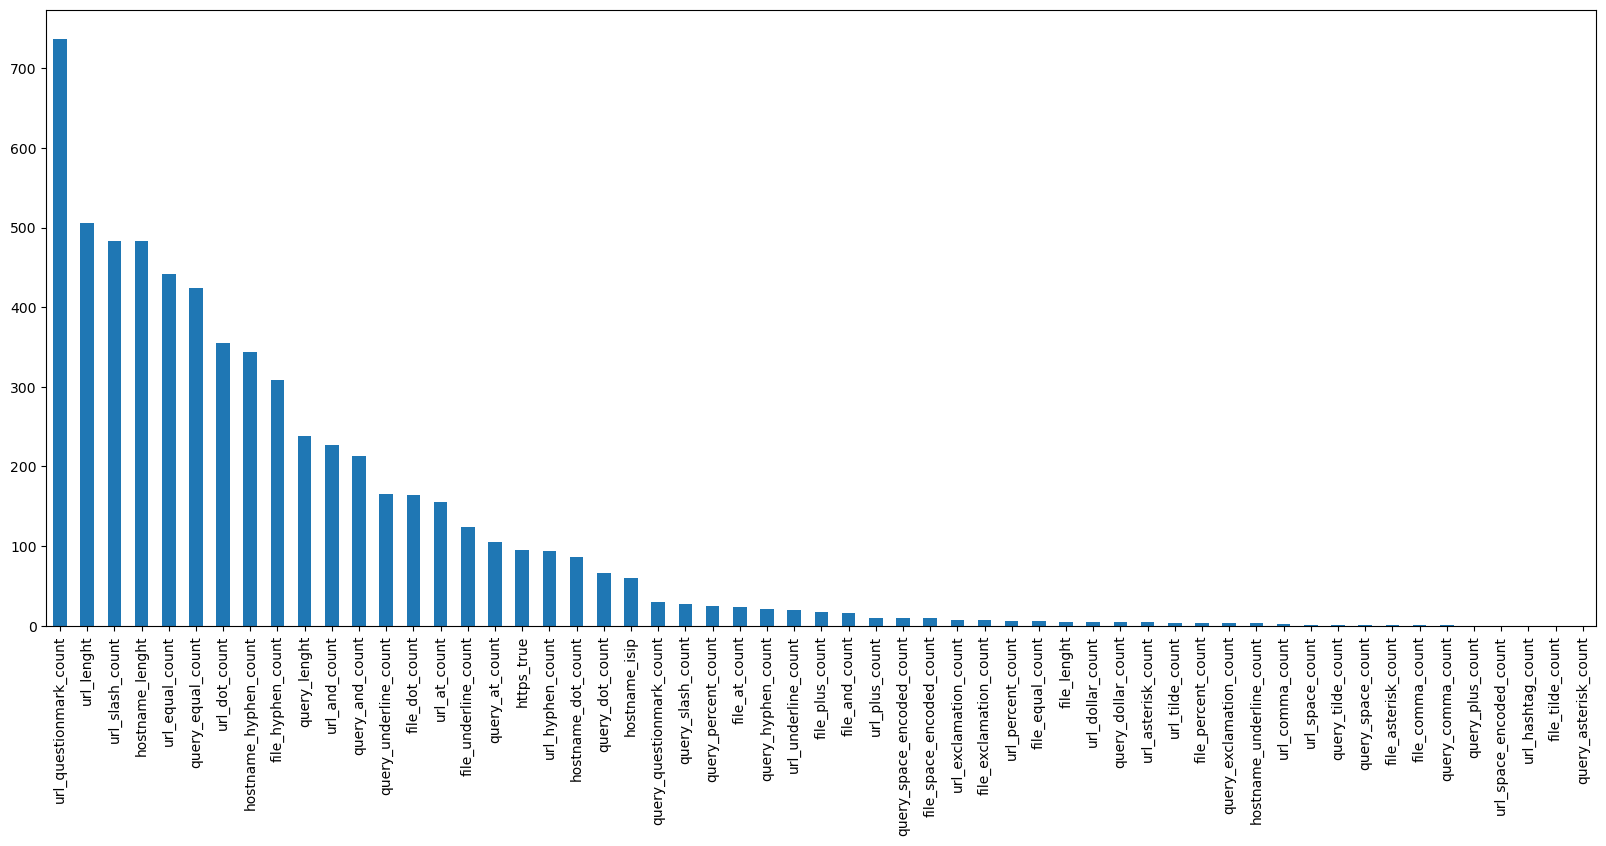

In [36]:
fc = SelectKBest(score_func=f_classif, k='all')
fc.fit(X_train,y_train)
anova =pd.Series(fc.scores_)
anova.index = X_train.columns
plot =anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Anova_Filter.png",dpi=300, bbox_inches = "tight")

In [28]:
fc = SelectKBest(score_func=f_classif, k=30)
X_train_selected=fc.fit_transform(X_train,y_train)
#X_test_selected=fc.fit_transform(X_train,y_train)
# anova =pd.Series(fc.scores_)
# anova.index = X_train.columns
# plot =anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))
# #anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
# fig = plot.get_figure()
# fig.savefig("PoC_Anova_Filter.png",dpi=300, bbox_inches = "tight")

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [56]:
fc.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False])

In [29]:
X_test_selected=X_test.loc[:, fc.get_support()]

In [118]:
X_train

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,1,44,2,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,88,8,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,88,3,0,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,1,154,6,0,4,7,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,49,2,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,52,1,0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,41,3,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,36,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X_train

In [16]:
X_test_selected.shape

(3429, 30)

In [30]:
X_train_selected=X_train.loc[:, fc.get_support()]

In [75]:
clf = svm.SVC(verbose=True)

[LibSVM]Accuracy: 0.7206182560513269
Accuracy: 0.553918680023571


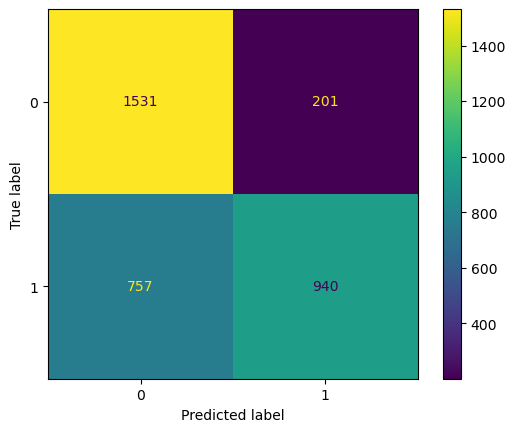

In [218]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [300]:
fs = SelectKBest(score_func=f_classif, k=35)

In [243]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma': ['scale','auto']},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma': ['scale','auto']},
                    # {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma': ['scale','auto']}]
                    {'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [239]:

def hyperpara_random_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':['scale','auto']},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':['scale','auto']},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma': ['scale','auto']}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  random=RandomizedSearchCV(svm.SVC(),param_distributions=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  random.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(random.best_estimator_)
  print('Best score for data:', random.best_score_)
  print('Best C:',random.best_estimator_.C) 
  print('Best Kernel:',random.best_estimator_.kernel)
  print('Best Gamma:',random.best_estimator_.gamma)

In [17]:
opt = BayesSearchCV(
svm.SVC(),
{
 'C': Real(1e-6, 1e+6, prior='log-uniform'),
'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
#'degree': Integer(1,8),
'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
},
 n_iter=32,
random_state=0
)

In [17]:
params = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    #'degree': Integer(1,8),
    'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
}

In [3]:
Real(1e-6, 100.0, prior='log-uniform')

Real(low=1e-06, high=100.0, prior='log-uniform', transform='identity')

In [18]:
opt = BayesSearchCV(
    svm.SVC(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [19]:
opt.fit(X_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

BayesSearchCV(cv=4, estimator=SVC(), n_iter=20, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=100.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=100.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'sigmoid', 'rbf'), prior=None)},
              verbose=1)

In [20]:
print(opt.best_score_)
print(opt.best_params_)

0.8168991754122938
OrderedDict([('C', 40.75578686240225), ('gamma', 0.012721120945522295), ('kernel', 'rbf')])


[LibSVM]Accuracy: 0.825653798256538
Accuracy: 0.7813789039481438


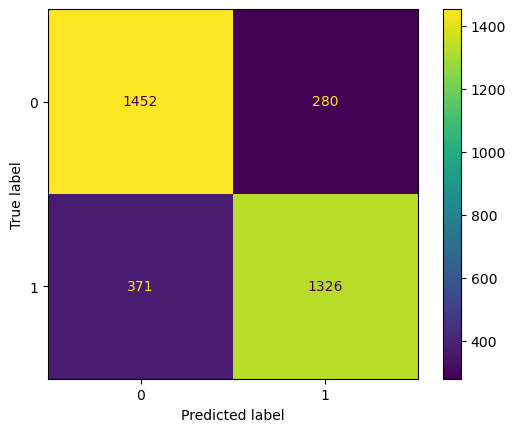

In [21]:
clf1 = svm.SVC(kernel='rbf',C=40.75578686240225,gamma=0.012721120945522295,verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [22]:
hyperpara_opt(features,label)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=1000, gamma=0.001)
Best score for data: 0.8126860769210609
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


In [244]:
hyperpara_opt(X_train_selected,y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
SVC(C=10, gamma='auto')
Best score for data: 0.8100251749125437
Best C: 10
Best Kernel: rbf
Best Gamma: auto


In [240]:
hyperpara_random_opt(X_train_selected,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
SVC(C=10, gamma='auto')
Best score for data: 0.8100251749125437
Best C: 10
Best Kernel: rbf
Best Gamma: auto


In [223]:
hyperpara_opt(X_train_selected,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=100, gamma=0.01)
Best score for data: 0.8195237381309346
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01


[LibSVM]Accuracy: 0.8174019607843137
Accuracy: 0.7860931054802592


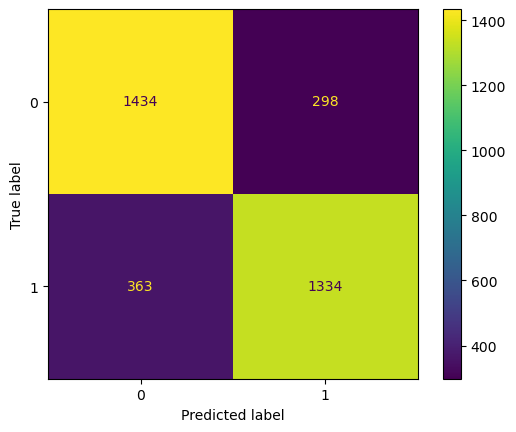

In [241]:
clf1 = svm.SVC(kernel='rbf',C=10,gamma='auto',verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

[LibSVM]Accuracy: 0.8563794255177021
Accuracy: 0.7554507955215085


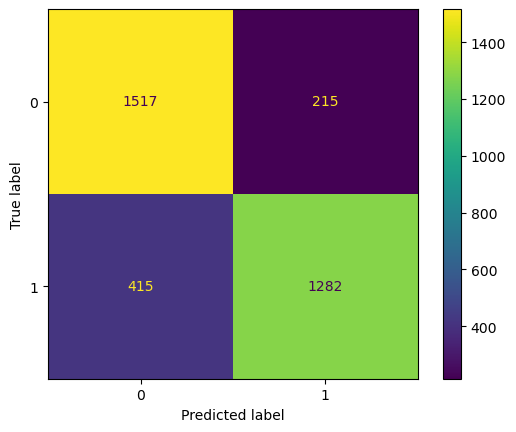

In [238]:
clf1 = svm.SVC(kernel='rbf',C=1000,gamma=0.001,verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
clf1 = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

[LibSVM]Accuracy: 0.8247809762202754
Accuracy: 0.7766647024160283


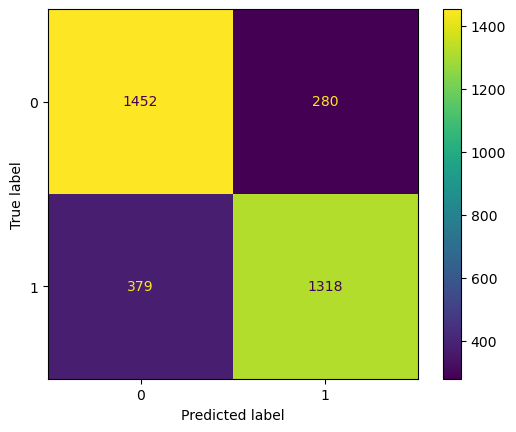

In [225]:
clf1 = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [226]:
displ.figure_.savefig('PoC_CM_anova_filter_tuning.png')

In [242]:
clf1 = svm.SVC(verbose=True)
clf1.fit(X_train_selected, y_train)
y_pred1 = clf1.predict(X_test_selected)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [22]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)